<a href="https://colab.research.google.com/github/MaggieHDez/ClassFiles/blob/main/practica19_MCHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 19. Ejercicios con EDA 2**
>**Alumno:** Margarita Cristina Hernández Delgadillo\
>**Matrícula:** 255879

##Descripción del conjunto de datos:
Utiliza el conjunto de datos "Haberman's Survival" disponible en el siguiente 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"'. Este conjunto contiene datos de pacientes con cáncer de mama, incluyendo edad, año de operación, número de ganglios axilares y estado de supervivencia (categórico). El conjunto de datos tiene valores faltantes.

Puedes emplear este codigo para cargar tu codigo

```url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
data = pd.read_csv(url, header=None, names=column_names```

## Instrucciones para los estudiantes
1. Descargar el archivo haberman.data desde el enlace proporcionado.

2. Realizar un EDA completo, incluyendo:

 - Descripción de los datos.

 - Histogramas para las columnas numéricas.

 - Gráficas de barras para la columna categórica status (supervivencia).

 - Boxplots para identificar outliers en las columnas numéricas.

 - Matriz de correlación y mapa de calor.

 - Pairplot para visualizar relaciones entre variables numéricas.

 - Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.

3. Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda.

4. Repetir el EDA después del tratamiento de datos faltantes y comparar los resultados

5. **Responde a estas preguntas y sube tus conclusiones a un PDF (se verificará el uso de IA)**

## Carga de datos

In [57]:
# Importamos la librerías a utlizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
df = pd.read_csv(url, header=None, names=column_names)

# Imprimimos las primeras 5 filas para verificar la carga correcta
print(df.head().to_string())
print('\n')
# Imprimimos las ultimas 5 filas para verificar también
print(df.tail().to_string())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


     age  year  nodes  status
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2


## Inicio de EDA

### Descripción de los datos (medias, medianas, desviaciones estándar, etc.).

In [58]:
# Se realiza la descripcion estadística con describe e info para identificar los datos de la tabla
print('El tipo de dato de cada columna es: ')
print(df.info())
print('\n')

# Descripcion estadística
print('El EDA de los datos es: ')
print(df.describe().to_string())
print('\n')

# Obtenemos la moda de cada columna
moda = df.mode().iloc[0]
print('La moda de cada columna es: ')
print(moda)

# Verificamps los valores faltantes
print("\nValores faltantes:")
print(df.isnull().sum())

# Buscamos si toda la fila está vacía
fila_vacia = df.isnull().all(axis=1)
print(fila_vacia)
print('\nNúmero de filas vacías completas', fila_vacia.sum())

# Revisamos si hay duplicados (las filas vacias son duplicados pero serán eliminadas)
print('\nNúmero de filas duplicadas', df.duplicated().sum())

# Cambiamos status a catergorico
df["status"] = df["status"].astype("category")
df["status"] = df["status"].map({1:"patient survived 5 years or longer", 2: "patient died within 5 years"})


print('El tipo de dato de cada columna es: ')
print(df.info())
print('\n')
print(df.describe().to_string())


El tipo de dato de cada columna es: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


El EDA de los datos es: 
              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


La moda de cada columna es: 
age       52
year      58
nodes      0
status     1
Name: 0, d

###Graficación

###Histogramas para las columnas numéricas


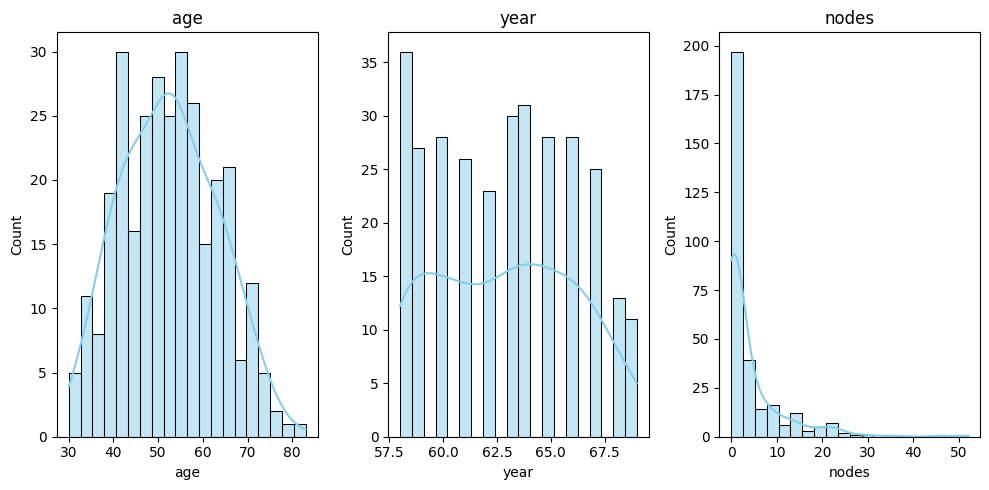

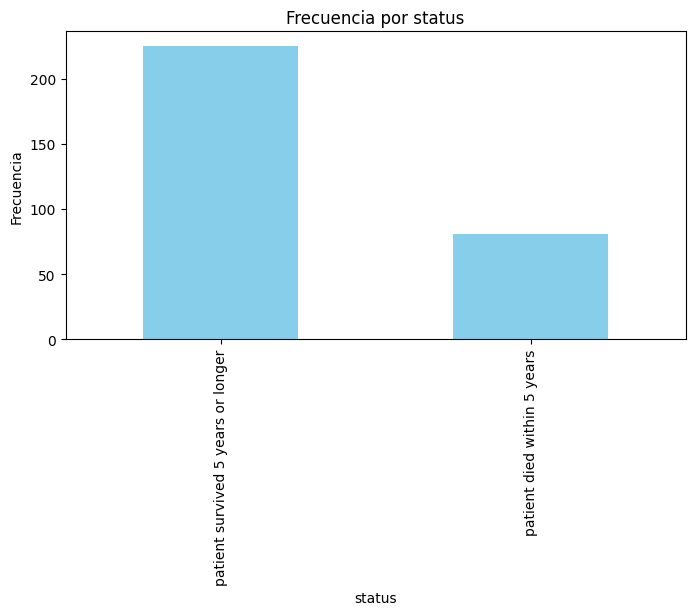

In [59]:
# Seleccionamos las columnas tipo numérica
columnas_hist = df.select_dtypes(include=[np.number])

# Se define la cantidad de gráficos y la cuadrícula para mostrar los datos
num_plots = len(columnas_hist.columns)
cols = 3  # Número de columnas en la cuadrícula(Pequeño para mostrar todo)
rows = int(np.ceil(num_plots / cols))

plt.figure(figsize=(10, 5))
for i, col in enumerate(columnas_hist.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(columnas_hist[col].dropna(), bins=20, kde=True, color='skyblue') # kde para PDF
    plt.title(col)

plt.tight_layout()
plt.show()

# Graficacion de columna status
plt.figure(figsize=(8, 4))
df['status'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frecuencia por status')
plt.xlabel('status')
plt.ylabel('Frecuencia')
plt.show()


### Boxplot para datos atípicos

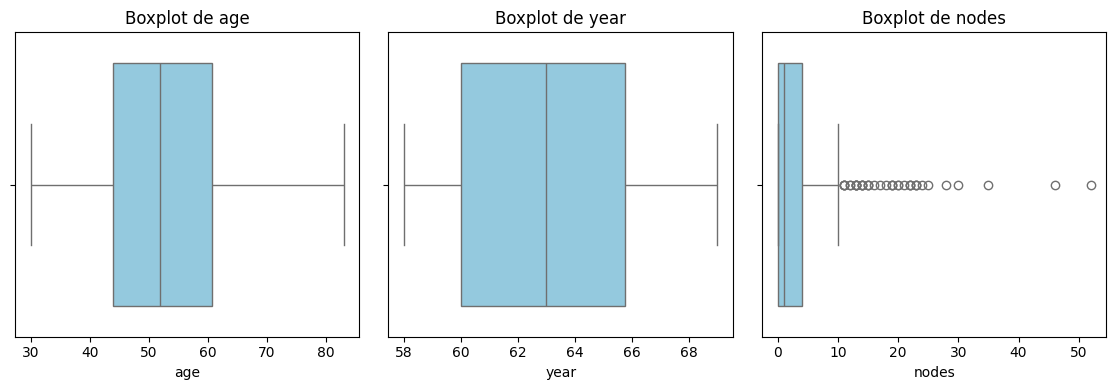

In [60]:
# Seleccionar solo columnas float64
columnas_box = df.select_dtypes(include=[np.number]).columns

# Calculo cuántas filas necesita el subplot
n = len(columnas_box)
rows = (n - 1) // 4 + 1

# Configuramos el tamaño de la figura
plt.figure(figsize=(15, rows * 4))

# Creamos boxplots para cada columna float64. dropna ayuda a cargarlos ya que marcaba error por datos faltantes
for i, col in enumerate(columnas_box, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(x=df[col].dropna(), color='skyblue')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

### Matriz de Correlación y Mapa de Calor

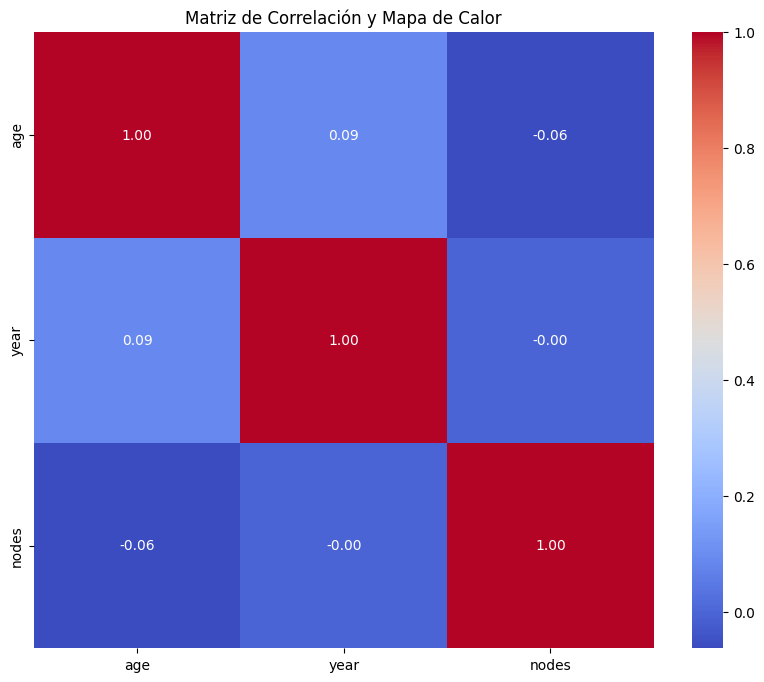

In [61]:
columnas_corr = df.select_dtypes(include=[np.number])
# Calculamos matriz de correlación
matriz_corr = columnas_corr.corr()

# Tamaño de la figura y generació del mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación y Mapa de Calor")
plt.show()

### Pairplot (Scatterplot)

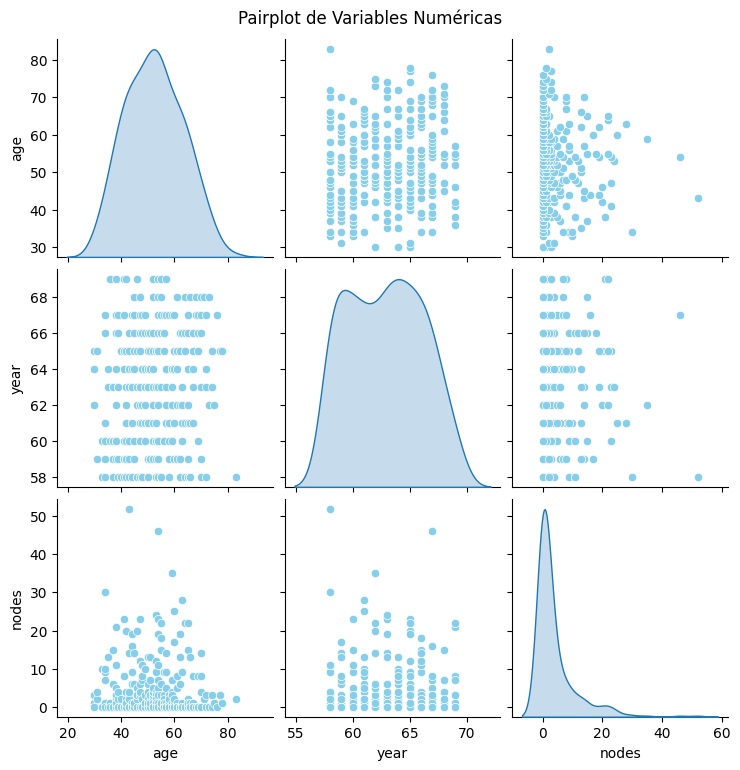

In [62]:
# Generar pairplot para las columnas numéricas
sns.pairplot(df.select_dtypes(include=[np.number]),
             diag_kind='kde',   # para que la diagonal muestre la densidad
             plot_kws={'color': 'skyblue'})
plt.suptitle("Pairplot de Variables Numéricas", y=1.02)
plt.show()

## Análisis de Normailidad

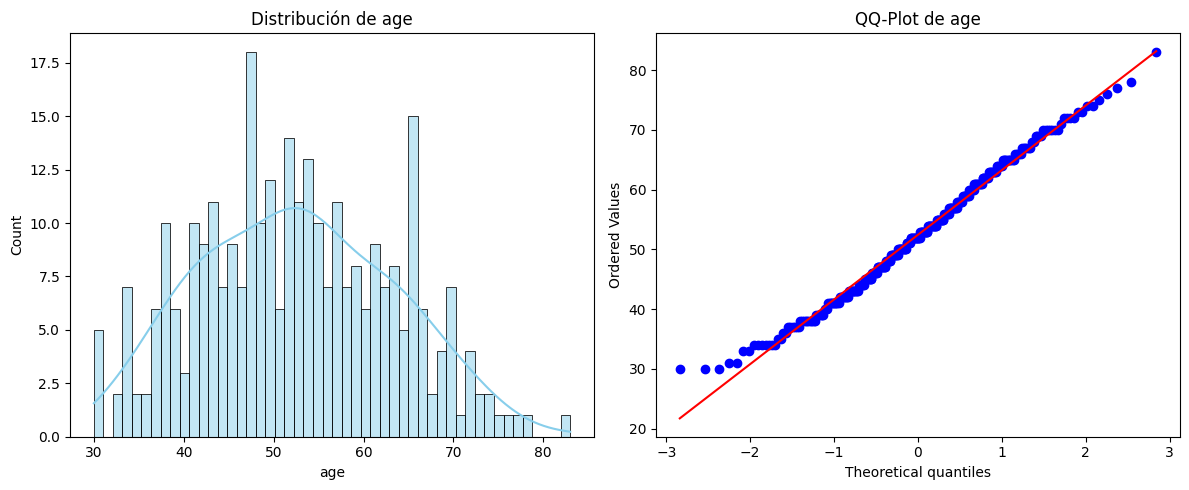


Pruebas de normalidad para la columna: age
Shapiro-Wilk Test: p-valor = 0.02605
Kolmogorov-Smirnov Test: p-valor = 0.46980
Anderson-Darling Test: Estadístico = 0.73156
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00780


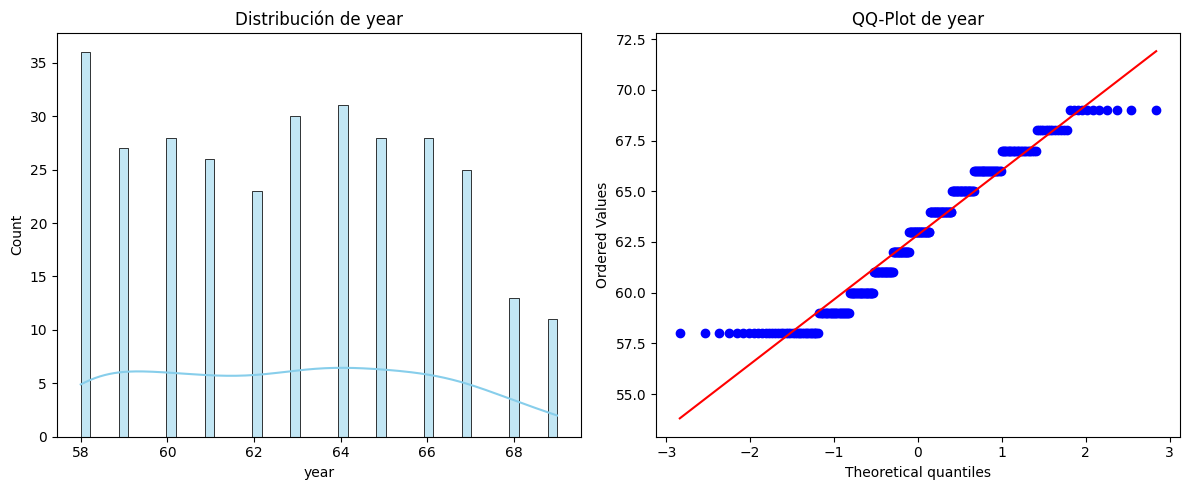


Pruebas de normalidad para la columna: year
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00158
Anderson-Darling Test: Estadístico = 4.31374
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


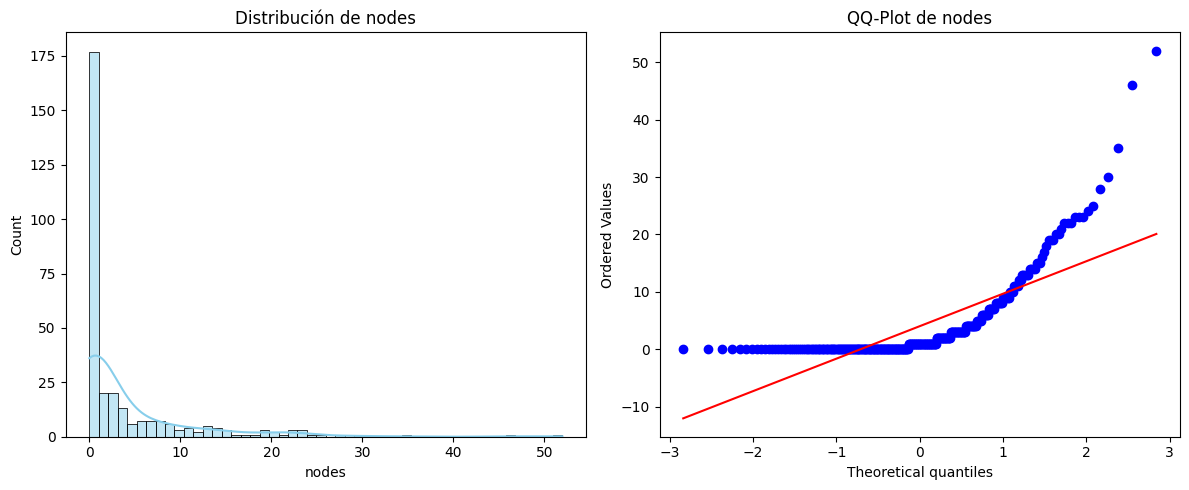


Pruebas de normalidad para la columna: nodes
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 39.68662
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [63]:
# Seleccionar solo las columnas numéricas
columnas_pruebas = df.select_dtypes(include=[np.number]).columns

def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Limpiar datos nulos, no funciona sin eliminarlos
    data_clean = data.dropna()

    # Verificar si la columna tiene al menos dos valores únicos
    if data_clean.nunique() < 2:
        print(f"La columna {column_name} es constante. No se pueden realizar pruebas de normalidad.")
        return

    # Tomar una muestra para Shapiro-Wilk ya que es para menos datos
    sample_data = data_clean.sample(min(5000, len(data_clean)), random_state=42)

    try:
        # Prueba de Shapiro-Wilk
        shapiro_test = stats.shapiro(sample_data)
        print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
    except Exception as e:
        print("Error en Shapiro-Wilk:", e)

    try:
        # Prueba de Kolmogorov-Smirnov
        ks_test = stats.kstest(data_clean, 'norm', args=(data_clean.mean(), data_clean.std()))
        print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")
    except Exception as e:
        print("Error en Kolmogorov-Smirnov:", e)

    try:
        # Prueba de Anderson-Darling
        anderson_test = stats.anderson(data_clean, dist='norm')
        print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
        for i in range(len(anderson_test.critical_values)):
            sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
            if anderson_test.statistic < cv:
                print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
            else:
                print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")
    except Exception as e:
        print("Error en Anderson-Darling:", e)

    try:
        # Prueba de D'Agostino-Pearson
        dagostino_test = stats.normaltest(data_clean)
        print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")
    except Exception as e:
        print("Error en D'Agostino-Pearson:", e)

def plot_distribution(data, column_name):
    data_clean = data.dropna()  # Eliminar valores nulos, nuevamente para verificar
    plt.figure(figsize=(12, 5))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data_clean, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data_clean, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.tight_layout()
    plt.show()

# Aplicar pruebas y gráficos a cada columna numérica
for column in columnas_pruebas:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)


## Tratamiento de datos

Número de filas duplicadas: 17

Nuevo tamaño del DataFrame: (289, 4)

Tipo de dato de cada columna despues de tratar los datos: 
<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     289 non-null    int64   
 1   year    289 non-null    int64   
 2   nodes   289 non-null    int64   
 3   status  289 non-null    category
dtypes: category(1), int64(3)
memory usage: 9.4 KB
None


El EDA despues de tratar los datos: 
              age        year       nodes
count  289.000000  289.000000  289.000000
mean    52.422145   62.906574    4.221453
std     10.876915    3.275794    7.325239
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.000000   66.000000    5.000000
max     83.000000   69.000000   52.000000

La moda despues de tratar los datos: 
age                             

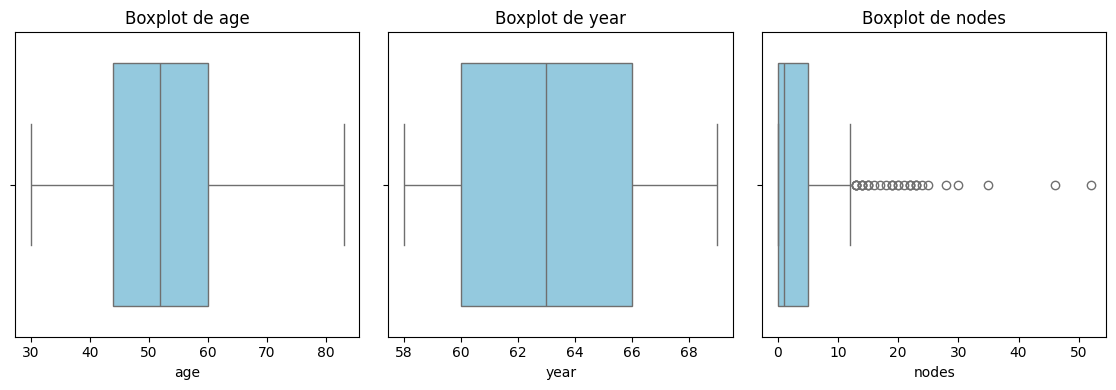

In [64]:
# Ya que no hubo datos faltantes o transformacion de columnas, se hará la eliminación de duplicados
# Revisamos nuevamente
print("Número de filas duplicadas:", df.duplicated().sum()) # 17

# Eliminar duplicados
df = df.drop_duplicates()

# Verificar el nuevo tamaño del DataFrame
print("\nNuevo tamaño del DataFrame:", df.shape)

# Volvemos a realizar la descripción estadística
print('\nTipo de dato de cada columna despues de tratar los datos: ')
print(df.info())
print('\n')
print('El EDA despues de tratar los datos: ')
print(df.describe().to_string())

# Moda
moda = df.mode().iloc[0]
print('\nLa moda despues de tratar los datos: ')
print(moda)


# Duplicados ddT
print('Número de filas duplicadas despues de tratar los datos', df.duplicated().sum()) # 0

# Revision de datos atipicos nuevamente
# Seleccionar solo columnas numéricas
columnas_box = df.select_dtypes(include=[np.number]).columns

# Calculo cuántas filas necesita el subplot
n = len(columnas_box)
rows = (n - 1) // 4 + 1

# Configuramos el tamaño de la figura
plt.figure(figsize=(15, rows * 4))

# Creamos boxplots para cada columna numérica. dropna por si acaso pero no hay datos faltantes
for i, col in enumerate(columnas_box, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(x=df[col].dropna(), color='skyblue')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


## EDA despues de tratamiento de datos

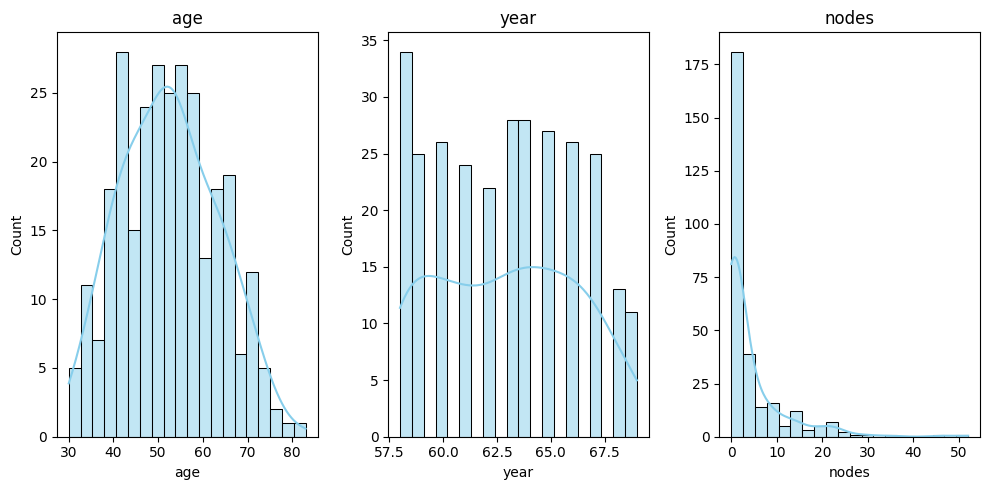

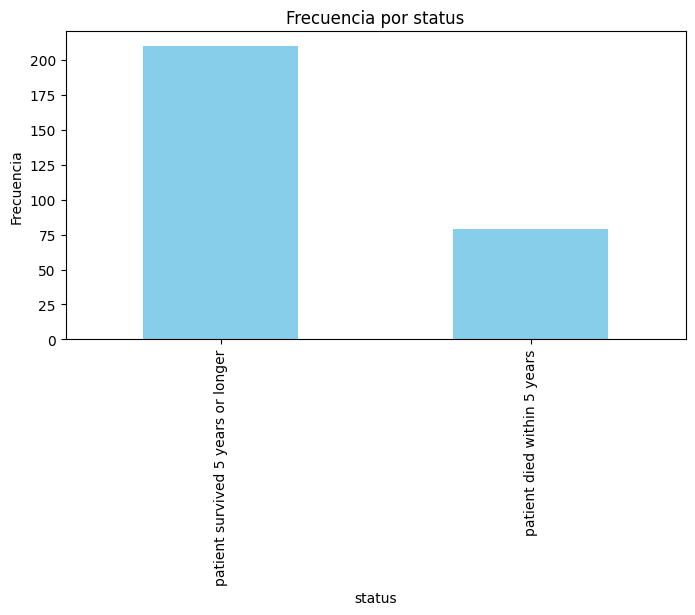

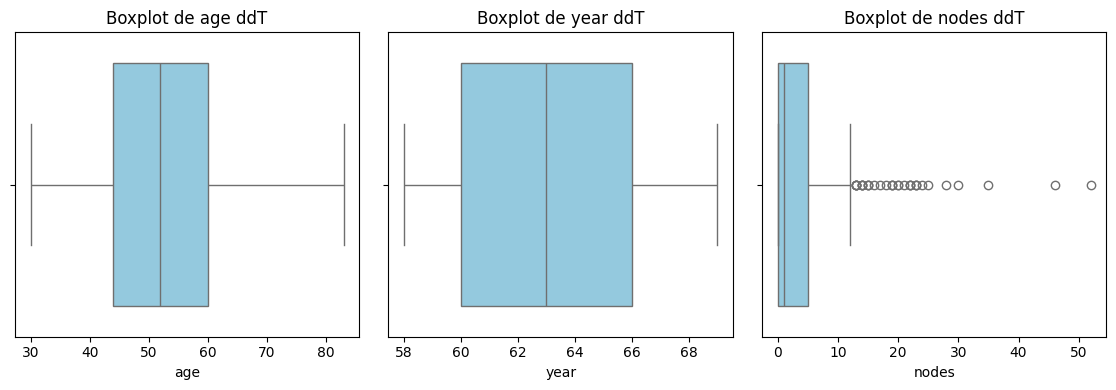

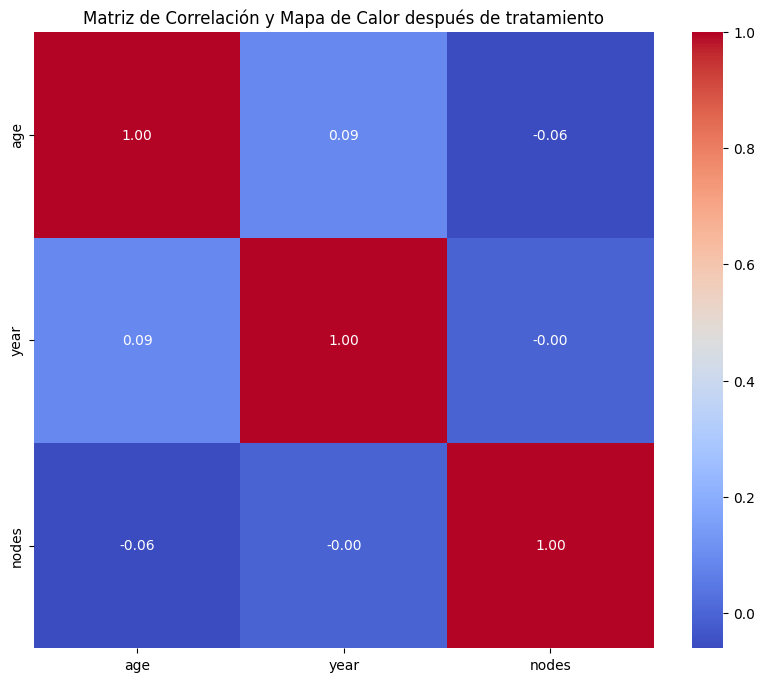

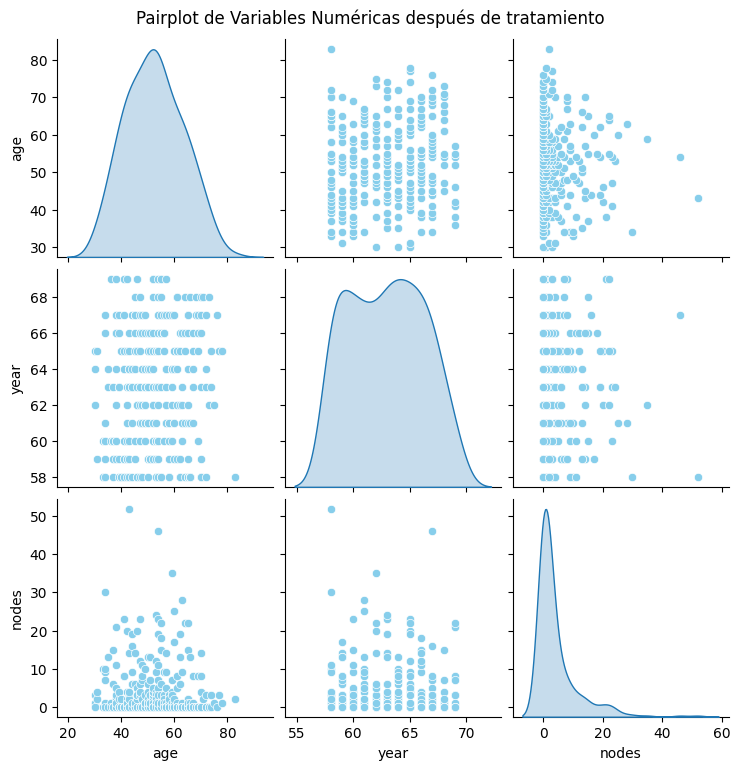

In [65]:
# Seleccionamos las columnas tipo numérica
columnas_hist = df.select_dtypes(include=[np.number])

# Definimos la cantidad de gráficos y la cuadrícula para mostrar los datos ddT
num_plots = len(columnas_hist.columns)
cols = 3  # Número de columnas en la cuadrícula
rows = int(np.ceil(num_plots / cols))

plt.figure(figsize=(10, 5))
for i, col in enumerate(columnas_hist.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(columnas_hist[col].dropna(), bins=20, kde=True, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

# Graficacion de columna status ddT
plt.figure(figsize=(8, 4))
df['status'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frecuencia por status')
plt.xlabel('status')
plt.ylabel('Frecuencia')
plt.show()

# Seleccionar solo columnas float64
columnas_box = df.select_dtypes(include=[np.number]).columns

# Calculo cuántas filas necesita el subplot
n = len(columnas_box)
rows = (n - 1) // 4 + 1

# Configuramos el tamaño de la figura
plt.figure(figsize=(15, rows * 4))

# Creamos boxplots para cada columna numérica.
for i, col in enumerate(columnas_box, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(x=df[col].dropna(), color='skyblue')
    plt.title(f'Boxplot de {col} ddT') # ddt= después de tratamiento
plt.tight_layout()
plt.show()

columnas_corr = df.select_dtypes(include=[np.number])
# Calculamos matriz de correlación
matriz_corr = columnas_corr.corr()

# Tamaño de la figura y generación del mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación y Mapa de Calor después de tratamiento")
plt.show()

# Generar pairplot para las columnas numéricas
sns.pairplot(df.select_dtypes(include=[np.number]),
             diag_kind='kde',   # para que la diagonal muestre la densidad
             plot_kws={'color': 'skyblue'})
plt.suptitle("Pairplot de Variables Numéricas después de tratamiento", y=1.02)
plt.show()

## Pruebas de Normalidad después de Tratamiento

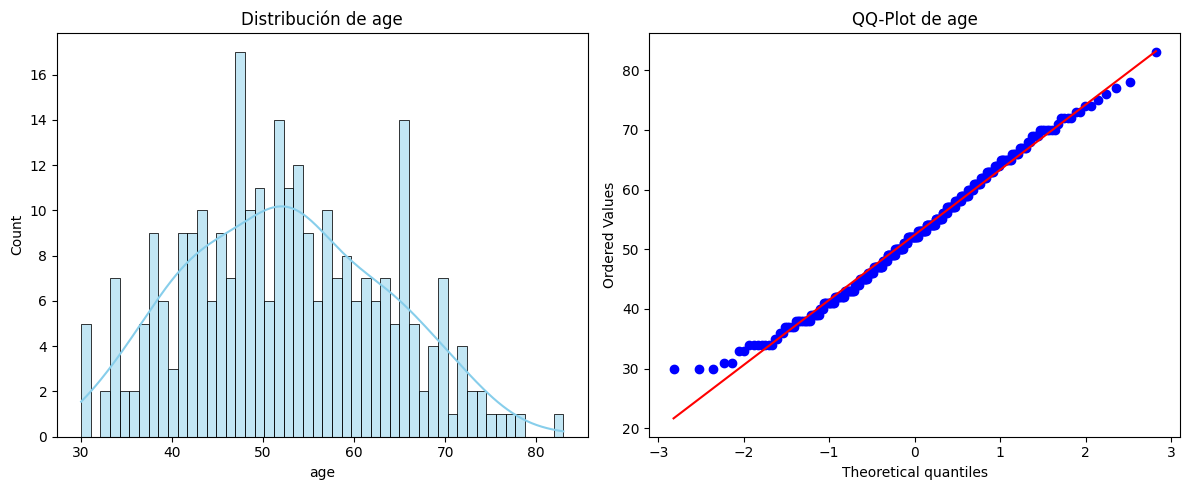


Pruebas de normalidad ddT para la columna: age
Shapiro-Wilk Test: p-valor = 0.03203
Kolmogorov-Smirnov Test: p-valor = 0.56971
Anderson-Darling Test: Estadístico = 0.68222
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.01316


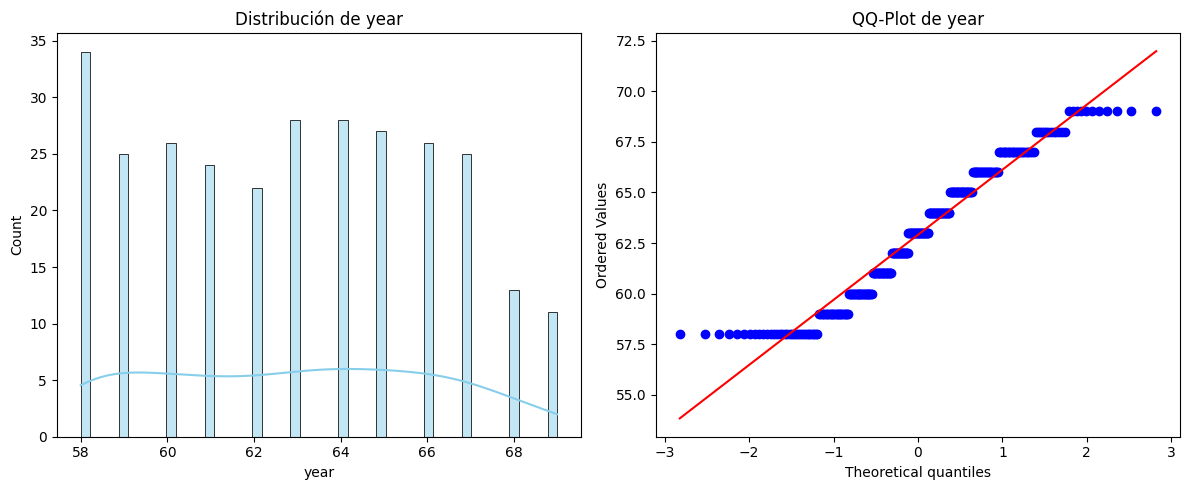


Pruebas de normalidad ddT para la columna: year
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00257
Anderson-Darling Test: Estadístico = 4.12975
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


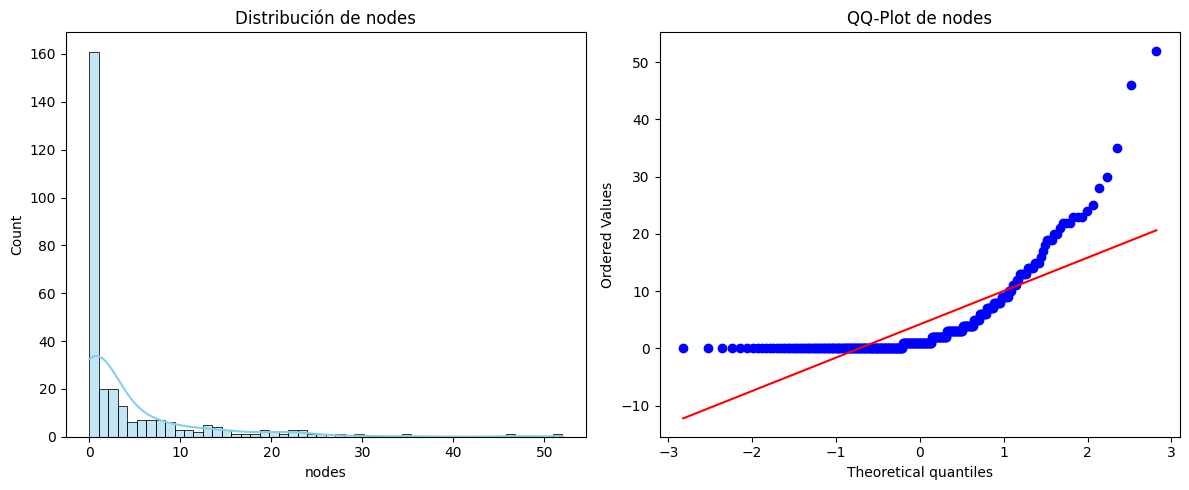


Pruebas de normalidad ddT para la columna: nodes
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 35.87851
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [66]:
# Seleccionar solo las columnas numéricas
columnas_pruebas = df.select_dtypes(include=[np.number]).columns

def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad ddT para la columna: {column_name}")

    # Limpiar datos nulos, no funciona sin eliminarlos
    data_clean = data.dropna()

    # Verificar si la columna tiene al menos dos valores únicos
    if data_clean.nunique() < 2:
        print(f"La columna {column_name} es constante. No se pueden realizar pruebas de normalidad.")
        return

    # Tomar una muestra para Shapiro-Wilk ya que es para menos datos
    sample_data = data_clean.sample(min(5000, len(data_clean)), random_state=42)

    try:
        # Prueba de Shapiro-Wilk
        shapiro_test = stats.shapiro(sample_data)
        print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
    except Exception as e:
        print("Error en Shapiro-Wilk:", e)

    try:
        # Prueba de Kolmogorov-Smirnov
        ks_test = stats.kstest(data_clean, 'norm', args=(data_clean.mean(), data_clean.std()))
        print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")
    except Exception as e:
        print("Error en Kolmogorov-Smirnov:", e)

    try:
        # Prueba de Anderson-Darling
        anderson_test = stats.anderson(data_clean, dist='norm')
        print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
        for i in range(len(anderson_test.critical_values)):
            sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
            if anderson_test.statistic < cv:
                print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
            else:
                print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")
    except Exception as e:
        print("Error en Anderson-Darling:", e)

    try:
        # Prueba de D'Agostino-Pearson
        dagostino_test = stats.normaltest(data_clean)
        print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")
    except Exception as e:
        print("Error en D'Agostino-Pearson:", e)

def plot_distribution(data, column_name):
    data_clean = data.dropna()  # Eliminar valores nulos, nuevamente para verificar
    plt.figure(figsize=(12, 5))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data_clean, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data_clean, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.tight_layout()
    plt.show()

# Aplicar pruebas y gráficos a cada columna numérica
for column in columnas_pruebas:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)
